# Heatmap and tables, Figure1, S1

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import os,sys
from scipy import stats
from collections import Counter
from matplotlib import patches
from matplotlib.colors import LinearSegmentedColormap

In [2]:
print(sys.version)

3.8.6 (default, Dec 18 2020, 08:42:53) 
[Clang 11.0.0 ]


In [3]:
%pip list | grep -e "numpy" -e "pandas" -e "matplotlib" -e "scipy" -e "seaborn" -e "lifelines"

lifelines                         0.25.8
matplotlib                        3.3.4
matplotlib-venn                   0.11.6
numpy                             1.20.2
pandas                            1.2.4
scipy                             1.6.0
seaborn                           0.11.1
You should consider upgrading via the '/Users/takamatsushiro/.pyenv/versions/3.8.6/envs/default/bin/python3.8 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [4]:
plt.style.use('seaborn-white')
plt.rcParams['figure.figsize']=4,3
plt.rcParams['figure.dpi']=300
plt.rcParams['axes.linewidth'] =0.5
plt.rcParams['lines.linewidth'] =0.5
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

# set font size
SMALL_SIZE = 7
MEDIUM_SIZE = 8
LARGE_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=LARGE_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('axes', linewidth=0.5) 
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  

In [5]:
store="../results/"

In [6]:
# import data
df=pd.read_csv("../data/TCGA_integrated_data_after_clustering.tsv"
               ,sep="\t",index_col=0)

In [7]:
# import germline data
germ=pd.read_csv("../data/TCGA_germline_info.tsv",sep="\t",index_col=0)
df=pd.merge(df,germ,left_index=True,right_index=True,how="left")
df[germ.columns]=df[germ.columns].fillna(0)

In [8]:
df["BRCA12_alt"]=(np.nansum(df.reindex(["gBRCA1_LOH","gBRCA2_LOH","sBRCA1_LOH","sBRCA2_LOH","BRCA2_homdel","BRCA1_methylation"],axis=1),axis=1) >=1).astype(float)
df["MMR_mut"]=(np.nansum(df.reindex(["sMMR_mut","gMMR_mut"],axis=1),axis=1) >=1).astype(float)

In [9]:
cluster_colors=['red', 'blue', 'green', "brown", 'purple', 'hotpink',"c",'y']
dict_cluster_colors={"SMK":'red', "UVL":'blue', "APB":'green', "POL":'brown', "MRD":'purple',\
                     "HRD":'hotpink',"GNS":"c","AGE":"y",np.nan:"grey"}
cluster_orders=["SMK","UVL","APB","POL","MRD","HRD","GNS","AGE"]
dict_cluster_order_number={ "SMK":0,"UVL":1,"APB":2,"POL":3,"MRD":4,"HRD":5,"GNS":6,"AGE":7,np.nan:8}

In [10]:
# make cancer colors
rgbs1=sns.color_palette("tab20", 20)
rgbs2=sns.color_palette("tab20b", 20)
rgbs1_3=[] 
for i,x in enumerate(rgbs1):
    if (i%4)!=0:
        rgbs1_3.append(x)
rgbs2_3=[] 
for i,x in enumerate(rgbs2):
    if (i%4)!=0:
        rgbs2_3.append(x)

cancer30_colors = sns.color_palette(rgbs1_3+rgbs2_3, 30)

In [11]:
cancers_freq_order=[x[0] for x in Counter( df["CancerType"]).most_common()]

In [34]:
dict_cancer_colors={ cancer:color for cancer,color in zip(cancers_freq_order,cancer30_colors)}
dict_cancer_colors["Others"]="whitesmoke"
dict_cancer_colors[""]="white"
dict_cancer_colors["BLCA"]="tab:green"

SARC


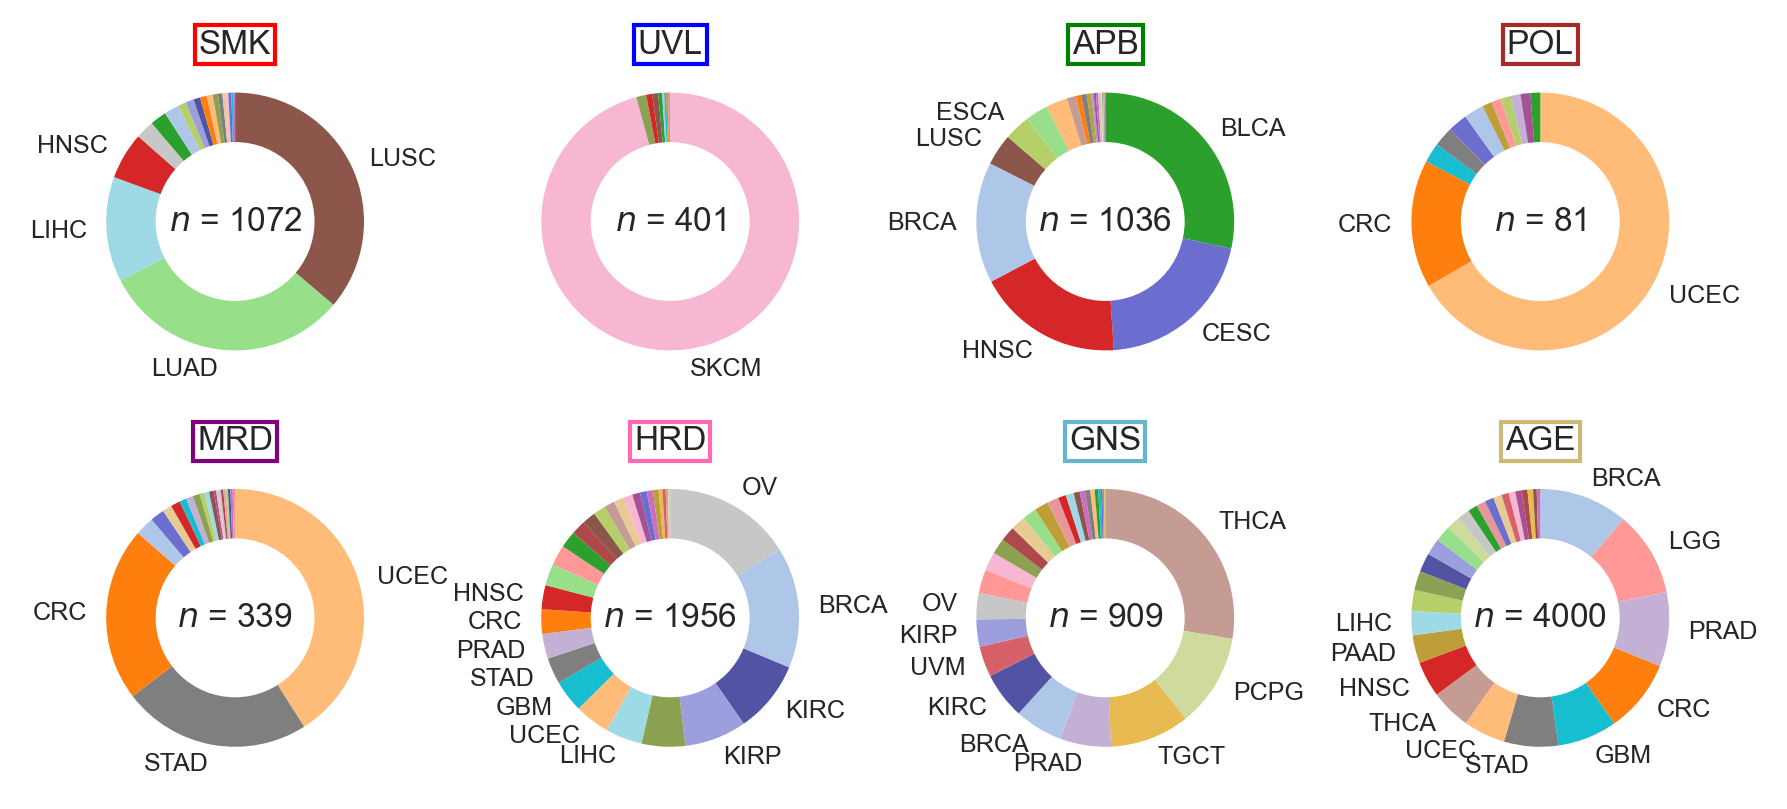

In [16]:
# pie chart
fig = plt.figure(figsize=(7,3.5))
names=cluster_orders
for j,name in enumerate(names):
    sns_df=df[ df["cluster_m2_names"]==name]
    ax = fig.add_subplot(2,4,j+1)
    counter=Counter(sns_df["CancerType"])
    counter_order=counter.most_common()
    cancer_order=[ x[0] for x in counter_order ]
    counts_order=[ counter[x] for x in cancer_order]
    labels=[cancer if counter[cancer]/len(sns_df)>=0.03 else "" for cancer in cancer_order]
    if j==5:
        print(labels[4])
        labels[4]=""
    colors=[dict_cancer_colors[x] for x in cancer_order]
    ax.pie(counts_order, explode=None, labels=labels, colors=colors, autopct=None,
                          pctdistance=0.6, shadow=False, labeldistance=1.15,
                          startangle=90, radius=1, counterclock=False,
                        center=(0, 0),
                          frame=False,  data=None,
              wedgeprops={'linewidth': 0, 'edgecolor':"white"},
              textprops={"size":6})
    ax.text(0.5,0.5,"$n$ = "+str(len(sns_df)),transform=ax.transAxes,fontsize=8,
               ha="center",va="center")
    circle = patches.Circle(xy=(0, 0), radius=0.6, fc='w', ec='w')
    ax.add_patch(circle)
    ax.set_title(name,size=8,ha="center",va="bottom",
                 bbox=dict(facecolor="w",edgecolor=dict_cluster_colors[name],
                          fill=True,linewidth=1,pad=1),pad=0)
plt.subplots_adjust(wspace=0.35,hspace=0)
#plt.savefig(store+"pie_chart_8subtype_cancertype.png",dpi=300,bbox_inches="tight")

# Heatmap

In [17]:
bwr=LinearSegmentedColormap.from_list('bwr', [(0,"blue"),(0.5,"w"),(1,"red")] )
wk=LinearSegmentedColormap.from_list('wk', [(0,"w"),(1,"k")] )
wr=LinearSegmentedColormap.from_list('wr', [(0,"w"),(1,"red")] )

In [18]:
# set colors
mask_color="w"
dict_translation={"0":mask_color, "1":"k","0.0":mask_color,"1.0":"k",0:mask_color,1:"k",
                 "Unknown":mask_color,"nan":mask_color,"Others":mask_color, "":mask_color }
dict_translation.update(dict_cluster_colors) 

In [19]:
df["AGE_z"]=stats.zscore(df["AGE"],nan_policy="omit")

Age
Sex_Female
AdvStage
Death
Smoking
HPV_status


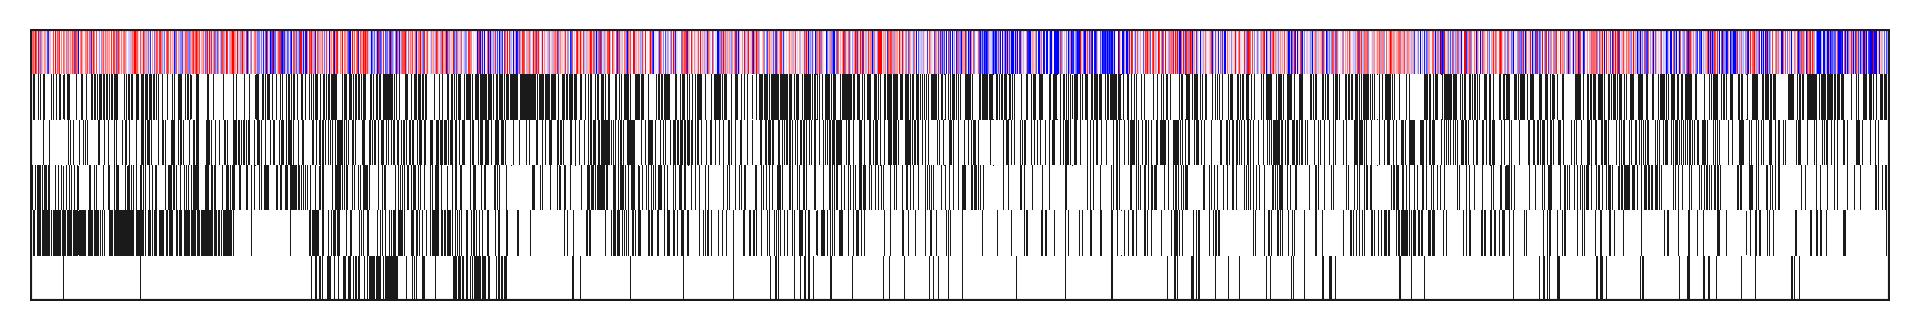

In [20]:
cat_list=["Age","Sex_Female","AdvStage","Death","Smoking","HPV_status"]
n=len(cat_list)

fig=plt.figure(figsize=(8, 0.2*n))
input_df=df.copy()
N=input_df.shape[0]
for i,cat in enumerate(cat_list):
    ax=fig.add_subplot(n,1,i+1)
    print(cat)
    if cat =="Age":
        sns.heatmap(df[["AGE_z"]].T,cmap=bwr,vmin=-1.5,vmax=1.5,xticklabels=0,yticklabels=0,cbar=False,ax=ax)
    else:
        sns.heatmap(df[[cat]].T,cmap=wk,vmin=0,vmax=1,xticklabels=0,yticklabels=0,cbar=False,ax=ax)
    if i==0:
        ax.axhline(y=0, color='k',linewidth=1)
    if i==n-1:
        ax.axhline(y=1, color='k',linewidth=1)
    ax.axvline(x=0, color='k',linewidth=1)
    ax.axvline(x=N, color='k',linewidth=1)
        
plt.subplots_adjust(hspace=0)
#plt.savefig(store+"Cluster_dendrogram_by_mutect2_clinical_info.png",dpi=300,bbox_inches="tight")

cluster_m2_names


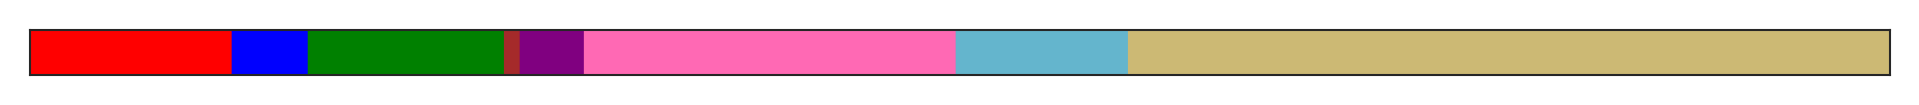

In [21]:
cat_list=["cluster_m2_names"]
n=len(cat_list)
fig=plt.figure(figsize=(8, 0.2*n))
input_df=df.copy()
N=input_df.shape[0]
for i,cat in enumerate(cat_list):
    ax=fig.add_subplot(n,1,i+1)
    print(cat)
    for j in range(N):
        val=str( input_df[cat][j] )
        r=patches.Rectangle(xy=(j/N,0),width=1/N,height=1,color=dict_translation[val])
        ax.add_patch(r)
    ax.set_xticks([])
    ax.set_yticks([])
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(0.5)
        
plt.subplots_adjust(hspace=0)
#plt.savefig(store+"Cluster_dendrogram_by_mutect2_subtype.png",dpi=300,bbox_inches="tight")

sPOLE_mut
MSI_high
MMR_mut
MLH1_methylation
BRCA12_alt


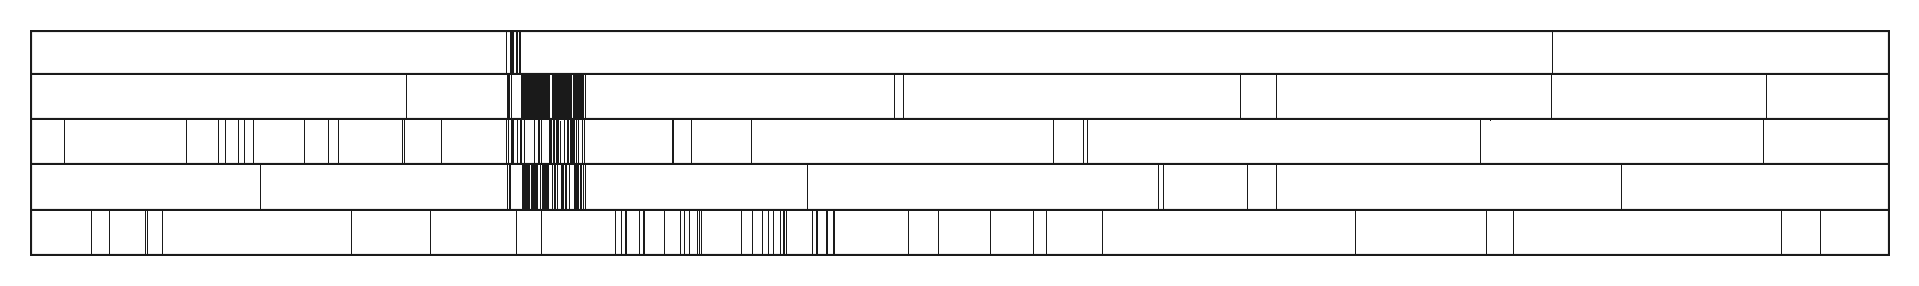

In [22]:
cat_list=["sPOLE_mut","MSI_high","MMR_mut","MLH1_methylation","BRCA12_alt"]
n=len(cat_list)
fig=plt.figure(figsize=(8, 0.2*n))
input_df=df.copy()
N=input_df.shape[0]
for i,cat in enumerate(cat_list):
    ax=fig.add_subplot(n,1,i+1)
    print(cat)
    sns.heatmap(df[[cat]].T,cmap=wk,vmin=0,vmax=1,xticklabels=0,yticklabels=0,cbar=False,ax=ax)
    if i==0:
        ax.axhline(y=0, color='k',linewidth=1)
    ax.axhline(y=1, color='k',linewidth=1)
    ax.axvline(x=0, color='k',linewidth=1)
    ax.axvline(x=N, color='k',linewidth=1)
        
plt.subplots_adjust(hspace=0)
#plt.savefig(store+"Cluster_dendrogram_by_mutect2_genomic_info.png",dpi=300,bbox_inches="tight")

In [23]:
df["TMB_log10_z"]=stats.zscore(df["TMB_log10"],nan_policy="omit")

TMB_log10_z


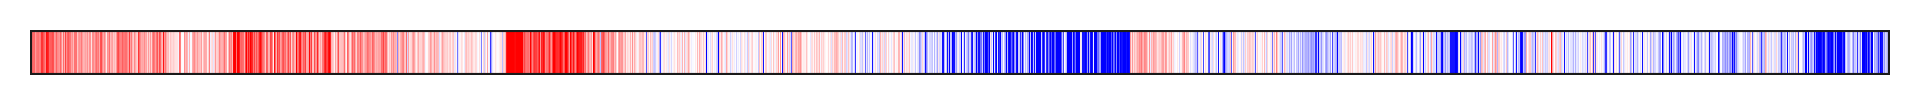

In [24]:
cont_list=["TMB_log10_z"]
n=len(cont_list)
fig=plt.figure(figsize=(8, 0.2*n))
input_df=df.copy()
N=input_df.shape[0]
for i,cat in enumerate(cont_list):
    ax=fig.add_subplot(n,1,i+1)
    print(cat)
    sns_df=input_df[[cat]].T
    sns.heatmap(sns_df,vmin=-2,vmax=2,ax=ax,cmap=bwr,cbar=False,xticklabels=0,yticklabels=0,
               linewidths=0)
    if i==0:
        ax.axhline(y=0, color='k',linewidth=1)
    if i==n-1:
        ax.axhline(y=1, color='k',linewidth=1)
    ax.axvline(x=0, color='k',linewidth=1)
    ax.axvline(x=N, color='k',linewidth=1)

plt.subplots_adjust(hspace=0)
#plt.savefig(store+"Cluster_dendrogram_by_mutect2_TMB.png",dpi=300,bbox_inches="tight")

In [25]:
cont_list=["CD8A_log_z","GZMB_log_z","IFNG_log_z",
           #"PDCD1_log_z","CD274_log_z","CTLA4_log_z",
           "CXCL9_log_z",
           "CXCL13_log_z",
           "CYT_log_z","GEP_score_z",]

CD8A_log_z
GZMB_log_z
IFNG_log_z
CXCL9_log_z
CXCL13_log_z
CYT_log_z
GEP_score_z


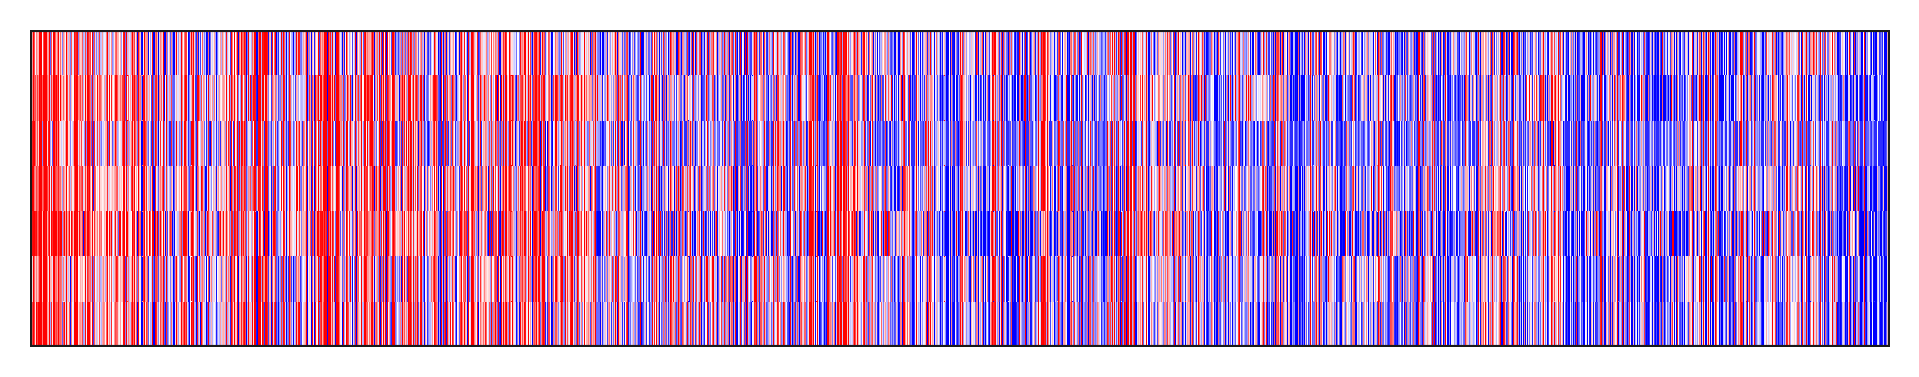

In [26]:
n=len(cont_list)
fig=plt.figure(figsize=(8, 0.2*n))
input_df=df.copy()
N=input_df.shape[0]
for i,cat in enumerate(cont_list):
    ax=fig.add_subplot(n,1,i+1)
    print(cat)
    sns_df=input_df[[cat]].T
    sns.heatmap(sns_df,vmin=-1.25,vmax=1.25,ax=ax,cmap=bwr,cbar=False,xticklabels=0,yticklabels=0,
               linewidths=0)
    if i==0:
        ax.axhline(y=0, color='k',linewidth=1)
    if i==n-1:
        ax.axhline(y=1, color='k',linewidth=1)
    ax.axvline(x=0, color='k',linewidth=1)
    ax.axvline(x=N, color='k',linewidth=1)

plt.subplots_adjust(hspace=0)
#plt.savefig(store+"Cluster_dendrogram_by_mutect2_gexp.png",dpi=300,bbox_inches="tight")

In [27]:
approved_order=[ 'LUAD', 'LUSC', "HNSC",'SKCM','BLCA', 'KIRC', 'LIHC', 'KIRP', 'STAD','CESC',  'ESCA',
                 'BRCA','CRC',
                 'UCEC', 'LGG', 'PRAD', 'THCA',  'OV', 'SARC', 'PCPG', 'PAAD', 'GBM','TGCT', 'MESO', 'UVM', 'ACC', 'KICH', 'UCS', 'CHOL']

In [28]:
dummy_cancertype=pd.get_dummies(df["CancerType"])

LUAD
HNSC
LUSC
SKCM
STAD
BLCA
LIHC
KIRC
CESC
KIRP
ESCA
515
507
492
467
437
412
364
336
289
281
184


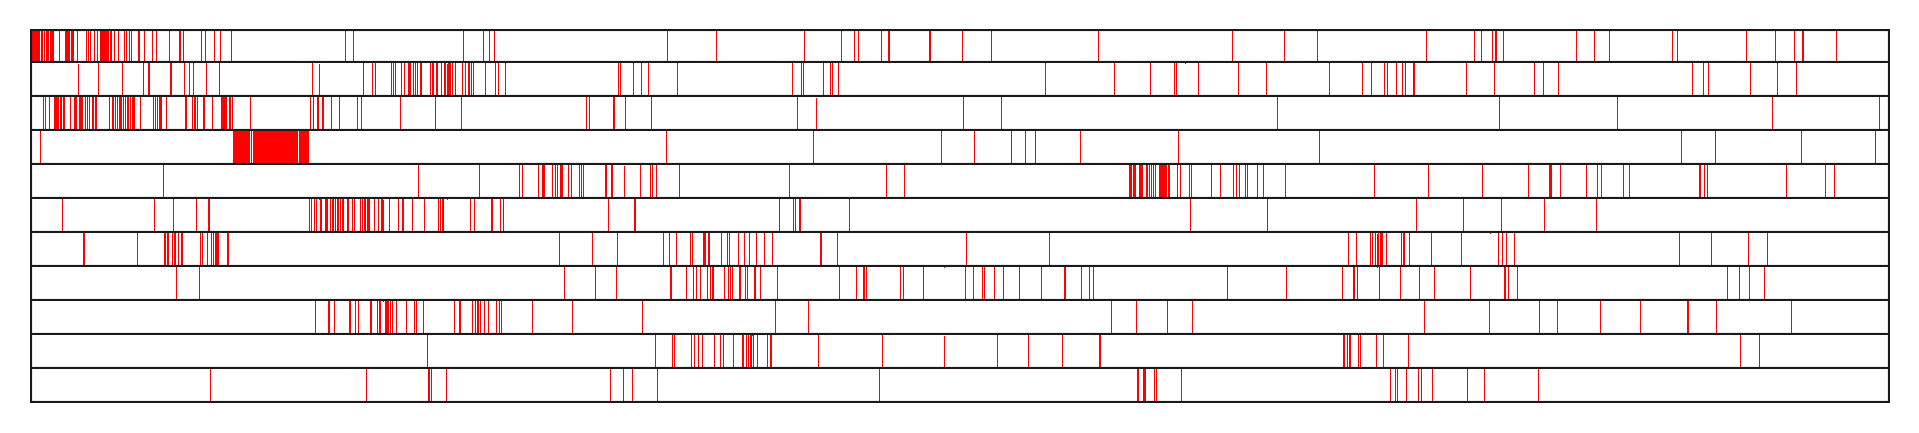

In [29]:
cat_list=approved_order[0:11]
tmp_df=df[ df["CancerType"].isin(cat_list)]
cat_list_order=[x[0] for x in Counter(tmp_df["CancerType"]).most_common()]
n=len(cat_list)
fig=plt.figure(figsize=(8, 0.15*n))
input_df=dummy_cancertype.copy()
N=input_df.shape[0]
numbers=[]
for i,cat in enumerate(cat_list_order):
    ax=fig.add_subplot(n,1,i+1)
    print(cat)
    numbers.append(np.sum(input_df[cat]))
    sns.heatmap(input_df[[cat]].T,cmap=wr,vmin=0,vmax=1,xticklabels=0,yticklabels=0,cbar=False,ax=ax)
    if i==0:
        ax.axhline(y=0, color='k',linewidth=1)
    ax.axhline(y=1, color='k',linewidth=1)
    ax.axvline(x=0, color='k',linewidth=1)
    ax.axvline(x=N, color='k',linewidth=1)
        
plt.subplots_adjust(hspace=0)
for i in numbers:
    print(i)

BRCA
CRC
UCEC
LGG
PRAD
THCA
OV
GBM
SARC
PCPG
PAAD
TGCT
ACC
MESO
UVM
KICH
UCS
CHOL
985
533
530
507
495
492
435
390
237
179
177
128
92
82
80
66
57
45


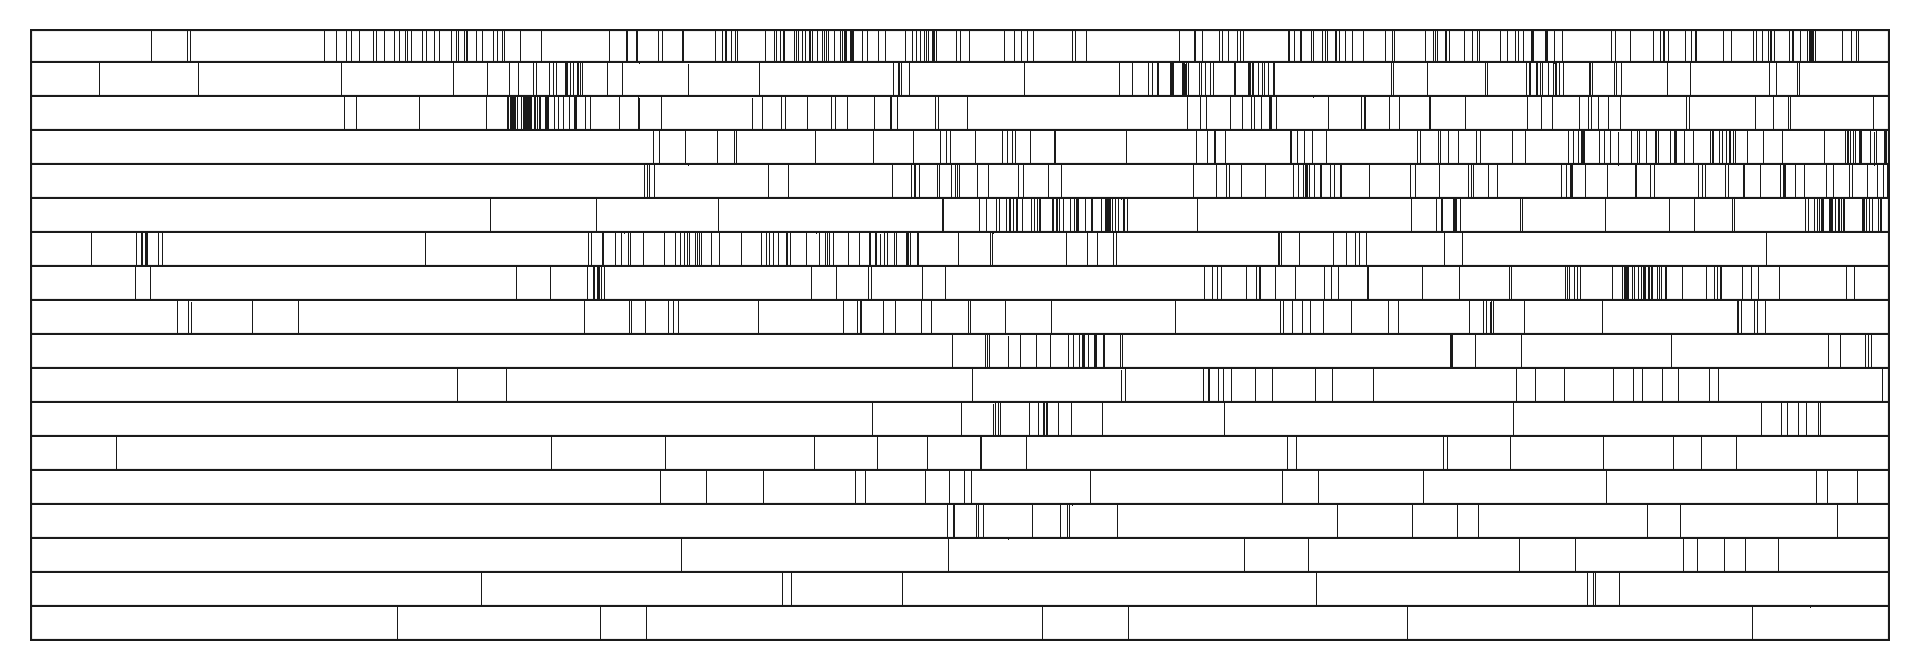

In [30]:
cat_list=approved_order[11:]
tmp_df=df[ df["CancerType"].isin(cat_list)]
cat_list_order2=[x[0] for x in Counter(tmp_df["CancerType"]).most_common()]
n=len(cat_list)
fig=plt.figure(figsize=(8, 0.15*n))
input_df=dummy_cancertype.copy()
N=input_df.shape[0]
numbers=[]
for i,cat in enumerate(cat_list_order2):
    ax=fig.add_subplot(n,1,i+1)
    print(cat)
    numbers.append(np.sum(input_df[cat]))
    sns.heatmap(input_df[[cat]].T,cmap=wk,vmin=0,vmax=1,xticklabels=0,yticklabels=0,cbar=False,ax=ax)
    if i==0:
        ax.axhline(y=0, color='k',linewidth=1)
    ax.axhline(y=1, color='k',linewidth=1)
    ax.axvline(x=0, color='k',linewidth=1)
    ax.axvline(x=N, color='k',linewidth=1)
        
plt.subplots_adjust(hspace=0)
for i in numbers:
    print(i)

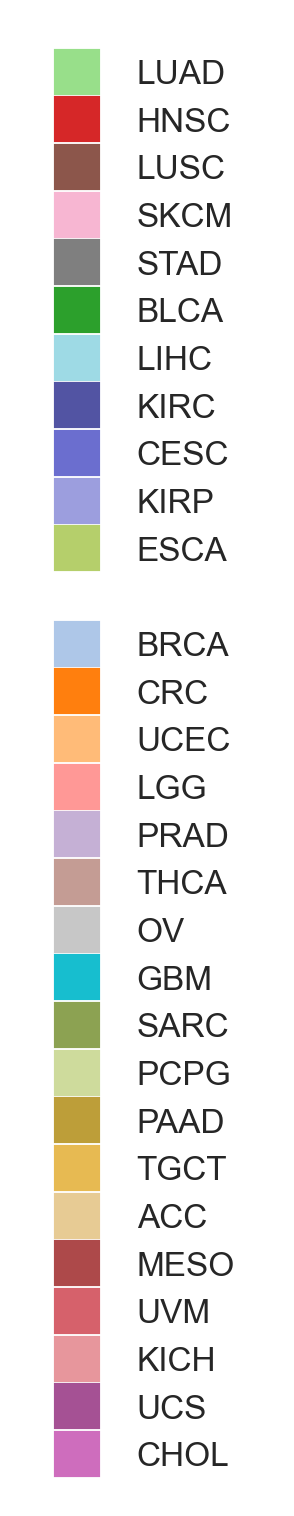

In [31]:
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
plt.figure(figsize=(1,5))
names=cat_list_order+[""]+cat_list_order2
custom_legends =[  Line2D( [0],[0], marker='s', markersize=10, color=dict_cancer_colors[cancer],
                          linestyle='None',label=cancer) for cancer  in names]
#custom_legends.append( Patch(facecolor="whitesmoke",label="Others" ))
plt.legend(handles=custom_legends)
plt.gca().set_axis_off()

In [32]:
df["FDA_approved"]=( df["CancerType"].isin(approved_order[0:11]) | (df["MSI_high"]>=1) ).astype(float)

FDA_approved


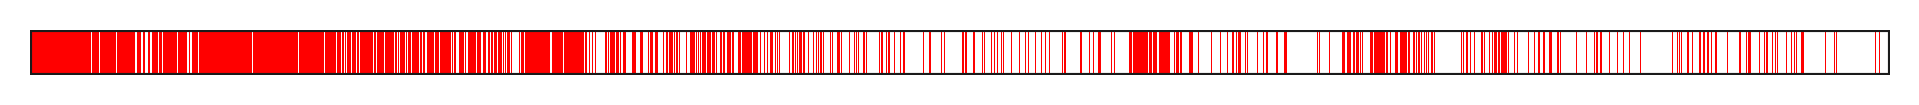

In [33]:
cat_list=["FDA_approved"]
n=len(cat_list)
fig=plt.figure(figsize=(8, 0.2*n))
input_df=df.copy()
N=input_df.shape[0]
for i,cat in enumerate(cat_list):
    ax=fig.add_subplot(n,1,i+1)
    print(cat)
    sns.heatmap(df[[cat]].T,cmap=wr,vmin=0,vmax=1,xticklabels=0,yticklabels=0,cbar=False,ax=ax)
    if i==0:
        ax.axhline(y=0, color='k',linewidth=1)
    ax.axhline(y=1, color='k',linewidth=1)
    ax.axvline(x=0, color='k',linewidth=1)
    ax.axvline(x=N, color='k',linewidth=1)
        
plt.subplots_adjust(hspace=0)
#plt.savefig(store+"Cluster_dendrogram_by_mutect2_FDA_approval.png",dpi=300,bbox_inches="tight")

# Table summary

([], [])

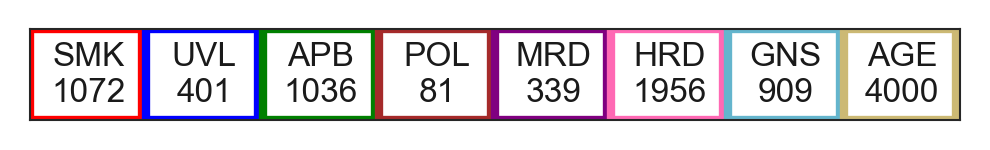

In [31]:
n=8
counter=Counter(df["cluster_m2_names"])
colors=cluster_colors
names=cluster_orders
labels=[name+"\n{}".format(counter[name]) for name in names]

fig = plt.figure(figsize=(4,0.4))
ax = fig.add_subplot(111)
for i,color in enumerate(colors):
    r=patches.Rectangle(xy=(i/n,0),width=1/(n+0.3),height=1,edgecolor=color,facecolor="w",lw=2)
    ax.add_patch(r)
    text=labels[i]
    ax.text(x=(i+0.5)/n,y=0.5,s=text,fontsize=8, ha="center",va="center", color="k")

plt.xticks([])
plt.yticks([])
#plt.savefig(store+"table_labels.png",dpi=300,bbox_inches="tight")

In [32]:
# AGE
age_by_cluster=pd.DataFrame(df.groupby(by="cluster_m2_names").mean()["AGE"]).T
age_by_cluster=age_by_cluster.loc[:,cluster_orders]

age_by_cluster_z=pd.DataFrame(df.groupby(by="cluster_m2_names").mean()["AGE_z"]).T
age_by_cluster_z=age_by_cluster_z.loc[:,cluster_orders]

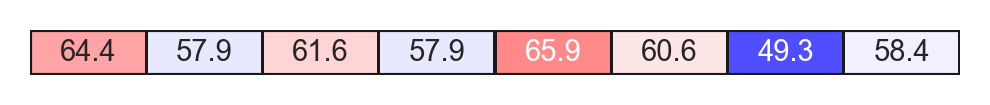

In [33]:
sns_df1=age_by_cluster
sns_df2=age_by_cluster_z

N=sns_df1.shape[0]
fig=plt.figure(figsize=(4,0.2*N))
ax=fig.add_subplot(111)
sns.heatmap(sns_df2,vmin=-1,vmax=1,cmap=bwr,annot=sns_df1,fmt=".3g",
           xticklabels=0,yticklabels=0,cbar=False,ax=ax,annot_kws={"fontsize":7},linecolor="k",linewidths=0.5)
ax.set_xlabel("")

ax.axvline(x=0, color='k',linewidth=1)
ax.axvline(x=sns_df.shape[1], color='k',linewidth=1)
ax.axhline(y=0, color='k',linewidth=1)
ax.axhline(y=sns_df.shape[0], color='k',linewidth=1)
#plt.savefig(store+"table_summary_age.png",dpi=300,bbox_inches="tight")

In [34]:
# category1
selected_cat=["Sex_Female","AdvStage","Death","Smoking","HPV_status"]
tmp_df=df[selected_cat].astype(float).astype(str)
selected_cat_dummies=pd.get_dummies( tmp_df)
selected_cat_dummies["cluster_m2_names"]=df["cluster_m2_names"]
category_sum=selected_cat_dummies.groupby("cluster_m2_names").sum()
category_sum

,Sex_Female_0.0,Sex_Female_1.0,AdvStage_0.0,AdvStage_1.0,AdvStage_nan,Death_0.0,Death_1.0,Death_nan,Smoking_0.0,Smoking_1.0,Smoking_nan,HPV_status_0.0,HPV_status_1.0,HPV_status_nan
cluster_m2_names,,,,,,,,,,,,,,
AGE,2032.0,1968.0,1593.0,1067.0,1340.0,2834.0,1163.0,3.0,449.0,273.0,3278.0,149.0,74.0,3777.0
APB,439.0,597.0,523.0,495.0,18.0,695.0,341.0,0.0,415.0,335.0,286.0,154.0,248.0,634.0
GNS,441.0,468.0,477.0,204.0,228.0,778.0,131.0,0.0,81.0,30.0,798.0,7.0,4.0,898.0
HRD,791.0,1165.0,854.0,755.0,347.0,1257.0,699.0,0.0,269.0,169.0,1518.0,51.0,25.0,1880.0
MRD,90.0,249.0,237.0,82.0,20.0,266.0,73.0,0.0,11.0,6.0,322.0,6.0,4.0,329.0
POL,14.0,67.0,57.0,19.0,5.0,73.0,8.0,0.0,2.0,3.0,76.0,2.0,0.0,79.0
SMK,659.0,413.0,750.0,290.0,32.0,657.0,415.0,0.0,179.0,635.0,258.0,59.0,7.0,1006.0
UVL,257.0,144.0,209.0,159.0,33.0,224.0,177.0,0.0,4.0,4.0,393.0,3.0,0.0,398.0


In [35]:
dict_cat_cluster_ratio={}
for cat in selected_cat:
    dict_cat_cluster_ratio[cat]={}
    for cluster in cluster_orders:
        ones=category_sum.loc[cluster,cat+"_1.0"]
        if cat in ["HPV_status","Smoking"]:
            total=category_sum.loc[cluster, cat+"_0.0",]+category_sum.loc[cluster,cat+"_1.0"]+\
            category_sum.loc[cluster, cat+"_nan"]
        else:
            total=category_sum.loc[cluster, cat+"_0.0",]+category_sum.loc[cluster,cat+"_1.0"]
        ratio=100 * ones/total
        dict_cat_cluster_ratio[cat][cluster]=ratio

df_cat_cluster_ratio1=pd.DataFrame.from_dict( dict_cat_cluster_ratio ).T
df_cat_cluster_ratio1

,SMK,UVL,APB,POL,MRD,HRD,GNS,AGE
Sex_Female,38.526119,35.910224,57.625483,82.716049,73.451327,59.560327,51.485149,49.200000
AdvStage,27.884615,43.206522,48.624754,25.000000,25.705329,46.923555,29.955947,40.112782
Death,38.712687,44.139651,32.915058,9.876543,21.533923,35.736196,14.411441,29.096823
Smoking,59.235075,0.997506,32.335907,3.703704,1.769912,8.640082,3.300330,6.825000
HPV_status,0.652985,0.000000,23.938224,0.000000,1.179941,1.278119,0.440044,1.850000


In [36]:
from sklearn.preprocessing import minmax_scale
tmp_df=df_cat_cluster_ratio1.copy()
df_cat_cluster_ratio1_a=pd.DataFrame( minmax_scale(tmp_df,axis=1), index=tmp_df.index,columns=tmp_df.columns)

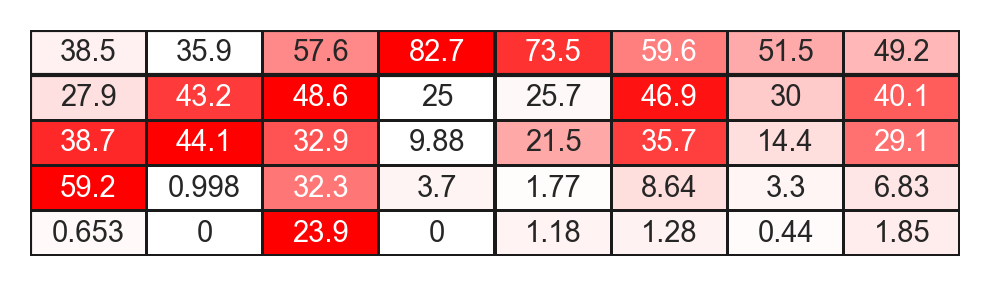

In [37]:
sns_df1=df_cat_cluster_ratio1
sns_df2=df_cat_cluster_ratio1_a

N=sns_df1.shape[0]
fig=plt.figure(figsize=(4,0.2*N))
ax=fig.add_subplot(111)
sns.heatmap(sns_df2,vmin=0,vmax=1,cmap=wr,annot=sns_df1,fmt=".3g",
           xticklabels=0,yticklabels=0,cbar=False,ax=ax,annot_kws={"fontsize":7},linecolor="k",linewidths=0.5)
ax.set_xlabel("")

ax.axvline(x=0, color='k',linewidth=1)
ax.axvline(x=sns_df.shape[1], color='k',linewidth=1)
ax.axhline(y=0, color='k',linewidth=1)
ax.axhline(y=sns_df.shape[0], color='k',linewidth=1)

#plt.savefig(store+"table_summary_clinical.png",dpi=300,bbox_inches="tight")

In [38]:
# category2
selected_cat=["sPOLE_mut","MSI_high","MMR_mut","MLH1_methylation","BRCA12_alt"]
tmp_df=df[selected_cat].astype(float).astype(str)
selected_cat_dummies=pd.get_dummies( tmp_df)
selected_cat_dummies["cluster_m2_names"]=df["cluster_m2_names"]
category_sum=selected_cat_dummies.groupby("cluster_m2_names").sum()
category_sum

,sPOLE_mut_0.0,sPOLE_mut_1.0,MSI_high_0.0,MSI_high_1.0,MSI_high_nan,MMR_mut_0.0,MMR_mut_1.0,MLH1_methylation_0.0,MLH1_methylation_1.0,MLH1_methylation_nan,BRCA12_alt_0.0,BRCA12_alt_1.0
cluster_m2_names,,,,,,,,,,,,
AGE,3998.0,2.0,3935.0,19.0,46.0,3978.0,22.0,3537.0,21.0,442.0,3982.0,18.0
APB,1036.0,0.0,1027.0,4.0,5.0,1013.0,23.0,987.0,4.0,45.0,1022.0,14.0
GNS,909.0,0.0,898.0,3.0,8.0,904.0,5.0,822.0,0.0,87.0,895.0,14.0
HRD,1956.0,0.0,1896.0,13.0,47.0,1939.0,17.0,1587.0,4.0,365.0,1767.0,189.0
MRD,339.0,0.0,17.0,309.0,13.0,244.0,95.0,87.0,223.0,29.0,335.0,4.0
POL,19.0,62.0,60.0,19.0,2.0,33.0,48.0,65.0,11.0,5.0,80.0,1.0
SMK,1072.0,0.0,1053.0,7.0,12.0,1053.0,19.0,1006.0,6.0,60.0,1046.0,26.0
UVL,401.0,0.0,398.0,0.0,3.0,389.0,12.0,316.0,2.0,83.0,399.0,2.0


In [39]:
dict_cat_cluster_ratio={}
for cat in selected_cat:
    dict_cat_cluster_ratio[cat]={}
    for cluster in cluster_orders:
        ones=category_sum.loc[cluster,cat+"_1.0"]
        if cat in ["MLH1_methylation"]:
            total=category_sum.loc[cluster, cat+"_0.0",]+category_sum.loc[cluster,cat+"_1.0"]+\
            category_sum.loc[cluster, cat+"_nan"]
        else:
            total=category_sum.loc[cluster, cat+"_0.0",]+category_sum.loc[cluster,cat+"_1.0"]
        ratio=100 * ones/total
        dict_cat_cluster_ratio[cat][cluster]=ratio

df_cat_cluster_ratio2=pd.DataFrame.from_dict( dict_cat_cluster_ratio ).T
df_cat_cluster_ratio2

,SMK,UVL,APB,POL,MRD,HRD,GNS,AGE
sPOLE_mut,0.000000,0.000000,0.000000,76.543210,0.000000,0.000000,0.000000,0.050000
MSI_high,0.660377,0.000000,0.387973,24.050633,94.785276,0.680985,0.332963,0.480526
MMR_mut,1.772388,2.992519,2.220077,59.259259,28.023599,0.869121,0.550055,0.550000
MLH1_methylation,0.559701,0.498753,0.386100,13.580247,65.781711,0.204499,0.000000,0.525000
BRCA12_alt,2.425373,0.498753,1.351351,1.234568,1.179941,9.662577,1.540154,0.450000


In [40]:
tmp_df=df_cat_cluster_ratio2.copy()
df_cat_cluster_ratio2_a=pd.DataFrame( minmax_scale(tmp_df,axis=1), index=tmp_df.index,columns=tmp_df.columns)

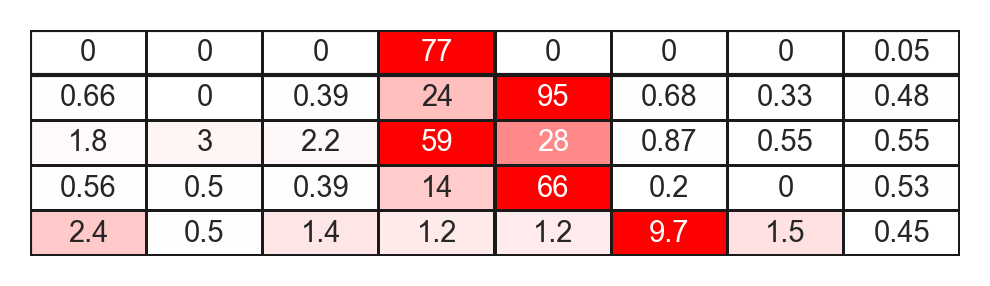

In [41]:
sns_df1=df_cat_cluster_ratio2
sns_df2=df_cat_cluster_ratio2_a

N=sns_df1.shape[0]
fig=plt.figure(figsize=(4,0.2*N))
ax=fig.add_subplot(111)
sns.heatmap(sns_df2,vmin=0,vmax=1,cmap=wr,annot=sns_df1,fmt=".2g",
           xticklabels=0,yticklabels=0,cbar=False,ax=ax,annot_kws={"fontsize":7},linecolor="k",linewidths=0.5)
ax.set_xlabel("")

ax.axvline(x=0, color='k',linewidth=1)
ax.axvline(x=sns_df.shape[1], color='k',linewidth=1)
ax.axhline(y=0, color='k',linewidth=1)
ax.axhline(y=sns_df.shape[0], color='k',linewidth=1)

#plt.savefig(store+"table_summary_genomic1.png",dpi=300,bbox_inches="tight")

In [42]:
cont_list=['TMB_log10','indel_count_log10','MSI_score','CNV_burden', 'HRD_score']
for cont in cont_list:
    df.loc[:,cont+"_z"]=stats.zscore(df.loc[:,cont],nan_policy="omit")

cont_list_z=[cont+"_z" for cont in cont_list]

In [43]:
mean_by_cluster=df.groupby("cluster_m2_names").mean()[cont_list].T
mean_by_cluster=mean_by_cluster.loc[:, cluster_orders]
mean_by_cluster

cluster_m2_names,SMK,UVL,APB,POL,MRD,HRD,GNS,AGE
TMB_log10,2.221316,2.510392,2.012553,3.596344,2.726495,1.664129,0.568045,1.378593
indel_count_log10,0.983545,0.587305,0.624167,1.579044,2.153386,0.748148,0.282245,0.506840
MSI_score,0.277135,0.110180,0.213609,4.769438,21.662796,0.425538,0.160735,0.250845
CNV_burden,55.548913,51.612584,46.753588,6.284246,15.523733,51.132327,25.720354,36.038275
HRD_score,30.722857,17.182741,25.409852,2.316456,5.343558,26.962553,8.270659,14.695100


In [44]:
mean_by_cluster_z=df.groupby("cluster_m2_names").mean()[cont_list_z].T
mean_by_cluster_z=mean_by_cluster_z.loc[:, cluster_orders]
mean_by_cluster_z

cluster_m2_names,SMK,UVL,APB,POL,MRD,HRD,GNS,AGE
TMB_log10_z,0.819750,1.221196,0.529836,2.729285,1.521304,0.045971,-1.476188,-0.350560
indel_count_log10_z,0.652530,-0.166690,-0.090480,1.883719,3.071164,0.165851,-0.797400,-0.333052
MSI_score_z,-0.163515,-0.199785,-0.177316,0.812438,4.482521,-0.131274,-0.188802,-0.169226
CNV_burden_z,0.460283,0.335812,0.182165,-1.097520,-0.805357,0.320626,-0.482929,-0.156665
HRD_score_z,0.650945,-0.113766,0.350880,-0.953375,-0.782412,0.438573,-0.617097,-0.254261


TMB_log10
indel_count_log10
MSI_score
CNV_burden
HRD_score


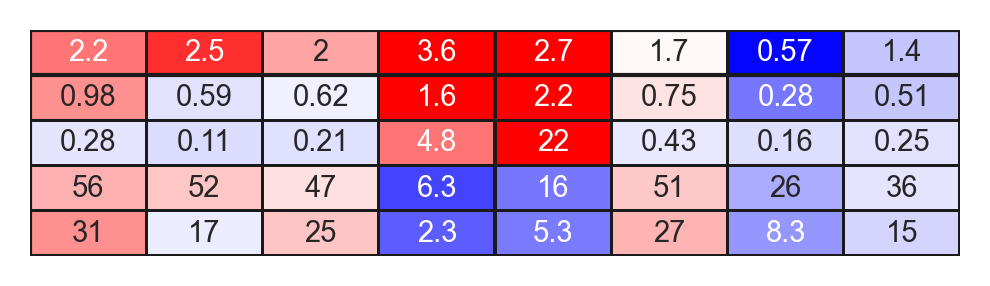

In [45]:
sns_df1=mean_by_cluster
sns_df2=mean_by_cluster_z

N=sns_df1.shape[0]
fig=plt.figure(figsize=(4,0.2*N))
ax=fig.add_subplot(111)
sns.heatmap(sns_df2,vmin=-1.5,vmax=1.5,cmap=bwr,annot=sns_df1,fmt=".2g",
           xticklabels=0,yticklabels=0,cbar=False,ax=ax,annot_kws={"fontsize":7},linecolor="k",linewidths=0.5)
ax.set_xlabel("")

ax.axvline(x=0, color='k',linewidth=1)
ax.axvline(x=sns_df.shape[1], color='k',linewidth=1)
ax.axhline(y=0, color='k',linewidth=1)
ax.axhline(y=sns_df.shape[0], color='k',linewidth=1)

for i in sns_df1.index:
    print(i)
    
#plt.savefig(store+"table_summary_genomic2.png",dpi=300,bbox_inches="tight")

In [46]:
cont_list=["CD8A_log","GZMB_log","IFNG_log",
           #"PDCD1_log","CD274_log","CTLA4_log",
           "CXCL9_log",
           "CXCL13_log", "CYT_log","GEP_score"]
cont_list_z=[cont+"_z" for cont in cont_list]

In [47]:
mean_by_cluster=df.groupby("cluster_m2_names").mean()[cont_list].T
mean_by_cluster=mean_by_cluster.loc[:, cluster_orders]
mean_by_cluster

cluster_m2_names,SMK,UVL,APB,POL,MRD,HRD,GNS,AGE
CD8A_log,5.197556,5.378664,5.046330,5.300987,5.318787,4.774315,4.826316,4.396304
GZMB_log,4.689118,4.461388,4.642936,5.003063,4.946106,3.688438,3.421196,3.329275
IFNG_log,1.957213,2.127351,1.977085,2.250468,2.131711,1.247311,1.256938,0.958016
CXCL9_log,6.619379,6.691902,6.498680,6.843810,6.603745,5.720904,5.435847,5.171380
CXCL13_log,5.364164,4.798328,5.047719,5.411304,5.316398,3.800639,3.287603,3.436245
CYT_log,5.018655,4.887140,4.834337,5.158759,5.209249,4.506828,4.334053,4.057764
GEP_score,108.593112,108.677576,107.235678,107.741734,108.031301,101.224632,99.322445,95.310720


In [48]:
mean_by_cluster_z=df.groupby("cluster_m2_names").mean()[cont_list_z].T
mean_by_cluster_z=mean_by_cluster_z.loc[:, cluster_orders]
mean_by_cluster_z

cluster_m2_names,SMK,UVL,APB,POL,MRD,HRD,GNS,AGE
CD8A_log_z,0.247739,0.372514,0.143575,0.318987,0.331280,-0.043810,-0.007989,-0.304222
GZMB_log_z,0.507864,0.368536,0.479615,0.699911,0.665094,-0.104292,-0.267772,-0.324007
IFNG_log_z,0.424435,0.550890,0.439192,0.642468,0.554198,-0.103382,-0.096256,-0.318500
CXCL9_log_z,0.441885,0.477123,0.383261,0.550810,0.434301,0.005572,-0.132852,-0.261279
CXCL13_log_z,0.601166,0.353609,0.462702,0.621785,0.580258,-0.082956,-0.307438,-0.242381
CYT_log_z,0.363439,0.268118,0.229853,0.464899,0.501547,-0.007479,-0.132680,-0.332909
GEP_score_z,0.410297,0.414917,0.336064,0.363737,0.379572,0.007336,-0.096690,-0.316078


CD8A
GZMB
IFNG
CXCL9
CXCL13
CYT
GEP_score


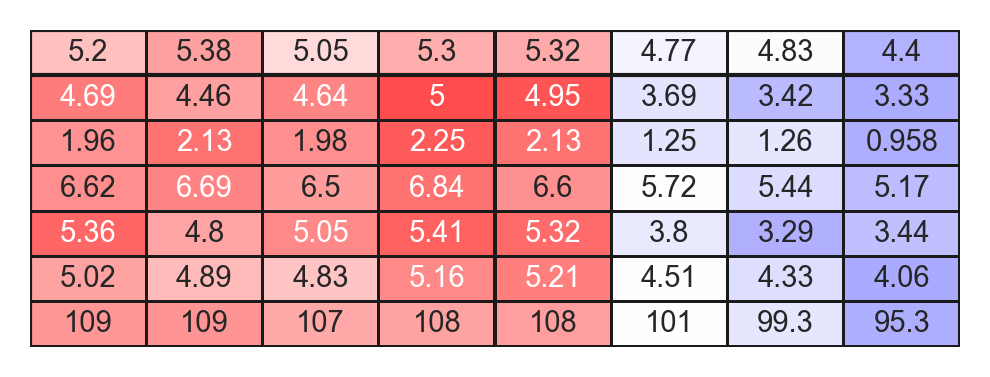

In [49]:
sns_df1=mean_by_cluster
sns_df2=mean_by_cluster_z

N=sns_df1.shape[0]
fig=plt.figure(figsize=(4,0.2*N))
ax=fig.add_subplot(111)
sns.heatmap(sns_df2,vmin=-1,vmax=1,cmap=bwr,annot=sns_df1,fmt=".3g",
           xticklabels=0,yticklabels=0,cbar=False,ax=ax,annot_kws={"fontsize":7},linecolor="k",linewidths=0.5)
ax.set_xlabel("")

ax.axvline(x=0, color='k',linewidth=1)
ax.axvline(x=sns_df.shape[1], color='k',linewidth=1)
ax.axhline(y=0, color='k',linewidth=1)
ax.axhline(y=sns_df.shape[0], color='k',linewidth=1)

for i in sns_df1.index:
    print(i.replace("_log",""))
    
#plt.savefig(store+"table_summary_gexp.png",dpi=300,bbox_inches="tight")

# Survival difference

In [50]:
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test,multivariate_logrank_test,pairwise_logrank_test

# make function
def KMcurve(data, duration="OS",duration_limit=None,event="Death",category=None,
                continuous=False, pct=None,ax=None,colors=None,group_order=None,
                linewidth=None,linestyle=None,weightings=None):
    """ if you set continuous category, set pct list of percentiles from  0 to 100 """
    """ weightings, options:'wilcoxon', 'tarone-ware' ,'peto' """
    # conditional branching by category's value types
    data=data.copy()
    if duration_limit:
        data[duration]=data[duration].clip(0,duration_limit)
    if ax==None:
        ax=fig.add_subplot(111)
    if category:
        # Curate the data, by drop the raw containing "NA"
        data=data.dropna(subset=[duration,event,category]) 
        if continuous:
            if len(pct)==0:
                print("pct were set as 50!")
                pct=[50]
            bins=[  np.min(data[category]) ]
            for i in range(len(pct)):
                bins.append( np.percentile(  data[category] , pct[i]  ) )
            bins.append(np.max(data[category]) )
            labels=[ category+"_"+str(i) for i in range(len(pct)+1) ]
            data[category]=pd.cut( data[category], bins=bins,labels=labels
                                 ,duplicates='drop',right=False)
            # divide samples by categories
            numbers, groups = pd.factorize(data[category])   
        else:
            numbers, groups = pd.factorize(data[category])
        
        # plot each group in one figure 
        print(numbers[:10],list(groups))
        if group_order:
            groups=group_order
        for i, group in enumerate(groups):
            tmp_df=data[ data[category]== group]
            group_size=len(tmp_df)
            kmf = KaplanMeierFitter()
            kmf.fit(durations=tmp_df[duration], event_observed=tmp_df[event],
                        label="{} ($n$={})".format(group, group_size) )
            # plot
            options={}
            if colors:
                options["color"]=colors[i]
            if linewidth:
                if type(linewidth)==list:
                    options["lw"]=linewidth[i]
                else:
                    options["lw"]=linewidth
            if linestyle:
                if type(linestyle)==list:
                    options["ls"]=linestyle[i]
                else:
                    options["ls"]=linestyle
            kmf.plot(ax=ax,ci_show=False, **options,
                     show_censors=True,censor_styles={'ms': 1})
        
        if data[category].dtype in ["int","float"]:
            print("KM plot stratified by "+ category +" div-percentile "+str(pct) )
        else:
            print("KM plot stratified by "+ category)
            
        if len(groups)==2:
            durations_A=data[ data[category]== groups[0] ][duration]
            durations_B=data[ data[category]== groups[1] ][duration]
            event_observed_A=data[ data[category]== groups[0] ][event]
            event_observed_B=data[ data[category]== groups[1] ][event]
            res=logrank_test(durations_A, durations_B, event_observed_A, event_observed_B,weightings=weightings)
            print(category,"simple log rank p=", res.summary.iloc[0,1])   
        elif  len(groups)>2:
            res= multivariate_logrank_test(event_durations=data[duration], event_observed=data[event],
                                       groups=data[category],weightings=weightings)
            print(category,"multivariate log rank p=", res.summary.iloc[0,1])
        
    else:
        print("no category ?")
        data=data.dropna(subset=[duration,event]) 
        kmf = KaplanMeierFitter()
        kmf.fit(durations=data[duration],event_observed=data[event] )
        kmf.plot(ax=ax)
        ax.set_title("KM plot none stratified" )
    
    ax.legend(title="",frameon=True,fontsize=8,edgecolor="k")
    ax.set_xlabel(duration)
    ax.set_ylabel("survival ratio")
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

[0 0 0 0 0 0 0 0 0 0] ['SMK', 'UVL', 'APB', 'POL', 'MRD', 'HRD', 'GNS', 'AGE']
KM plot stratified by cluster_m2_names
cluster_m2_names multivariate log rank p= 3.1940902223546516e-39


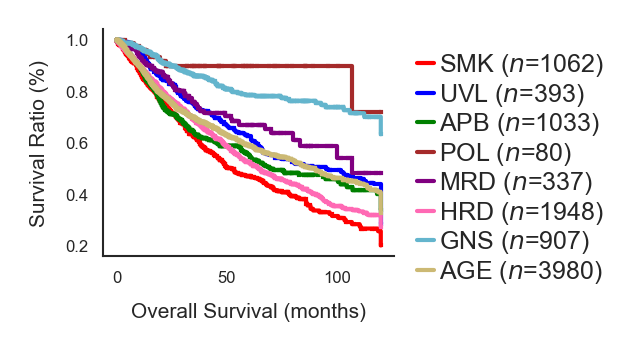

In [51]:
input_df=df.copy()

fig=plt.figure(figsize=(1.25,1))
ax=fig.add_subplot(111)
KMcurve(data=input_df,category="cluster_m2_names",group_order=cluster_orders,
        colors=cluster_colors,duration_limit=120,linewidth=1,ax=ax)
ax.set_xlabel("Overall Survival (months)",fontsize=5)
ax.set_ylabel("Survival Ratio (%)",fontsize=5)
ax.tick_params(labelsize=4)
ax.legend(frameon=False,edgecolor="k",fontsize=6,bbox_to_anchor=(1, 1),handlelength=0.7
           ,labelspacing=0.1,handletextpad=0.2)

#plt.savefig(store+"KM_subtype_all.png",dpi=300,bbox_inches="tight")

[0 0 0 0 0 0 0 0 0 0] ['Others', 'POL+MRD']
KM plot stratified by POL+MRD
POL+MRD simple log rank p= 0.0019695948109615183


<ipython-input-180-05b69709a845>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input_df[cat]= [ cat if x in ["POL","MRD"] else "Others" for x in input_df["cluster_m2_names"]  ]


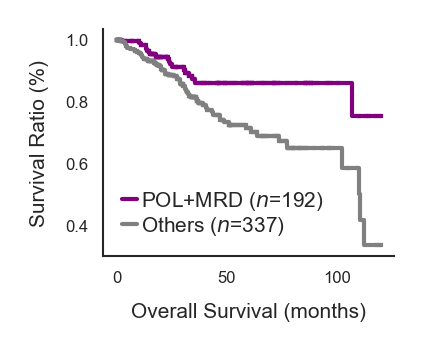

In [180]:
input_df=df.copy()
cancer="UCEC"
cat="POL+MRD"
input_df=df[df["CancerType"]==cancer]
input_df[cat]= [ cat if x in ["POL","MRD"] else "Others" for x in input_df["cluster_m2_names"]  ] 

group_order=[cat, "Others"]
colors=["purple","grey"]

fig=plt.figure(figsize=(1.25,1))
ax=fig.add_subplot(111)
KMcurve(data=input_df,category=cat,group_order=group_order,
        colors=colors,duration_limit=120,linewidth=1,ax=ax)
ax.set_xlabel("Overall Survival (months)",fontsize=5)
ax.set_ylabel("Survival Ratio (%)",fontsize=5)
ax.tick_params(labelsize=4)
ax.legend(frameon=False,edgecolor="k",fontsize=5,handlelength=0.7,labelspacing=0.1,handletextpad=0.2)

#plt.savefig(store+"KM_subtype_UCEC.png",dpi=300,bbox_inches="tight")

[0 0 0 0 0 0 0 0 0 0] ['Others', 'APB']
KM plot stratified by APB
APB simple log rank p= 0.005028842107398078


<ipython-input-56-d0bc4c932f47>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input_df[cat]= [ cat if x ==cat else "Others" for x in input_df["cluster_m2_names"]  ]


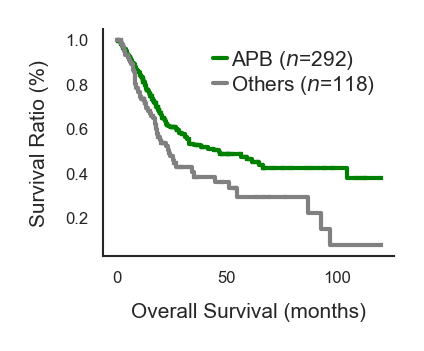

In [56]:
input_df=df.copy()
cancer="BLCA"
cat="APB"
input_df=df[df["CancerType"]==cancer]
input_df[cat]= [ cat if x ==cat else "Others" for x in input_df["cluster_m2_names"]  ] 

group_order=[cat,"Others"]
colors=["green","grey"]

fig=plt.figure(figsize=(1.25,1))
ax=fig.add_subplot(111)
KMcurve(data=input_df,category=cat,group_order=group_order,
        colors=colors,duration_limit=120,linewidth=1,ax=ax)
ax.set_xlabel("Overall Survival (months)",fontsize=5)
ax.set_ylabel("Survival Ratio (%)",fontsize=5)
ax.tick_params(labelsize=4)
ax.legend(frameon=False,edgecolor="k",fontsize=5,handlelength=0.7,labelspacing=0.1,handletextpad=0.2)

#plt.savefig(store+"KM_subtype_BLCA.png",dpi=300,bbox_inches="tight")

[0 0 0 0 0 0 0 0 0 0] ['SMK', 'Others']
KM plot stratified by SMK
SMK simple log rank p= 0.014376130084522487


<ipython-input-57-0c335e6ea414>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input_df[cat]= [ cat if x ==cat else "Others" for x in input_df["cluster_m2_names"]  ]


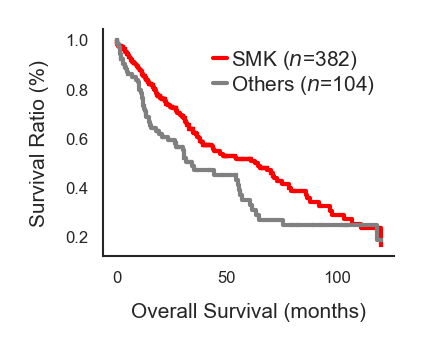

In [57]:
input_df=df.copy()
cancer="LUSC"
cat="SMK"
input_df=df[df["CancerType"]==cancer]
input_df[cat]= [ cat if x ==cat else "Others" for x in input_df["cluster_m2_names"]  ] 

group_order=[cat,"Others"]
colors=["red","grey"]

fig=plt.figure(figsize=(1.25,1))
ax=fig.add_subplot(111)
KMcurve(data=input_df,category=cat,group_order=group_order,
        colors=colors,duration_limit=120,linewidth=1,ax=ax)
ax.set_xlabel("Overall Survival (months)",fontsize=5)
ax.set_ylabel("Survival Ratio (%)",fontsize=5)
ax.tick_params(labelsize=4)
ax.legend(frameon=False,edgecolor="k",fontsize=5,handlelength=0.7,labelspacing=0.1,handletextpad=0.2)

#plt.savefig(store+"KM_subtype_LUSC.png",dpi=300,bbox_inches="tight")

[0 0 0 0 1 1 1 1 1 1] ['Others', 'UVL']
KM plot stratified by UVL
UVL simple log rank p= 1.0424055263010313e-05


<ipython-input-58-3711b4e40a30>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input_df[cat]= [ cat if x ==cat else "Others" for x in input_df["cluster_m2_names"]  ]


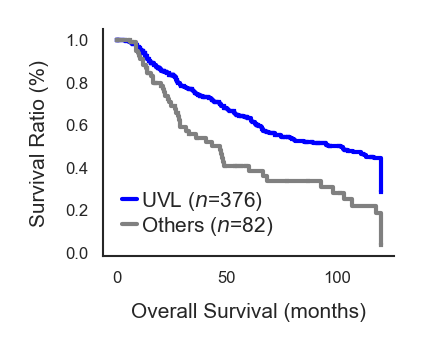

In [58]:
input_df=df.copy()
cancer="SKCM"
cat="UVL"
input_df=df[df["CancerType"]==cancer]
input_df[cat]= [ cat if x ==cat else "Others" for x in input_df["cluster_m2_names"]  ] 

group_order=[cat,"Others"]
colors=["blue","grey"]

fig=plt.figure(figsize=(1.25,1))
ax=fig.add_subplot(111)
KMcurve(data=input_df,category=cat,group_order=group_order,
        colors=colors,duration_limit=120,linewidth=1,ax=ax)
ax.set_xlabel("Overall Survival (months)",fontsize=5)
ax.set_ylabel("Survival Ratio (%)",fontsize=5)
ax.tick_params(labelsize=4)
ax.legend(frameon=False,edgecolor="k",fontsize=5,handlelength=0.7,labelspacing=0.1,handletextpad=0.2)

#plt.savefig(store+"KM_subtype_SKCM.png",dpi=300,bbox_inches="tight")

[0 0 0 0 0 0 0 0 0 0] ['Others', 'AGE']
KM plot stratified by AGE
AGE simple log rank p= 0.008468499211624356


<ipython-input-59-e71fb0d45884>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input_df[cat]= [ cat if x ==cat else "Others" for x in input_df["cluster_m2_names"]  ]


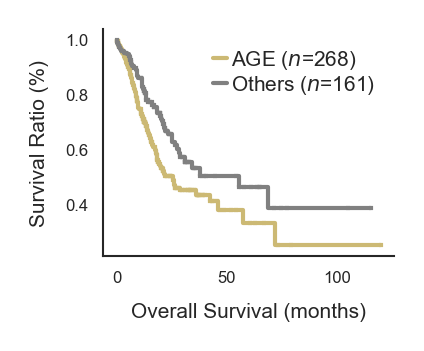

In [59]:
input_df=df.copy()
cancer="STAD"
cat="AGE"
input_df=df[df["CancerType"]==cancer]
input_df[cat]= [ cat if x ==cat else "Others" for x in input_df["cluster_m2_names"]  ] 

group_order=[cat,"Others"]
colors=["y","grey"]

fig=plt.figure(figsize=(1.25,1))
ax=fig.add_subplot(111)
KMcurve(data=input_df,category=cat,group_order=group_order,
        colors=colors,duration_limit=120,linewidth=1,ax=ax)
ax.set_xlabel("Overall Survival (months)",fontsize=5)
ax.set_ylabel("Survival Ratio (%)",fontsize=5)
ax.tick_params(labelsize=4)
ax.legend(frameon=False,edgecolor="k",fontsize=5,handlelength=0.7,labelspacing=0.1,handletextpad=0.2)

#plt.savefig(store+"KM_subtype_STAD.png",dpi=300,bbox_inches="tight")

[0 0 0 0 0 0 0 0 0 0] ['Others', 'AGE+GNS']
KM plot stratified by AGE+GNS
AGE+GNS simple log rank p= 0.0008226612572946546


<ipython-input-60-92e86d693ac8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input_df[cat]= [ cat if x in ["AGE","GNS"] else "Others" for x in input_df["cluster_m2_names"]  ]


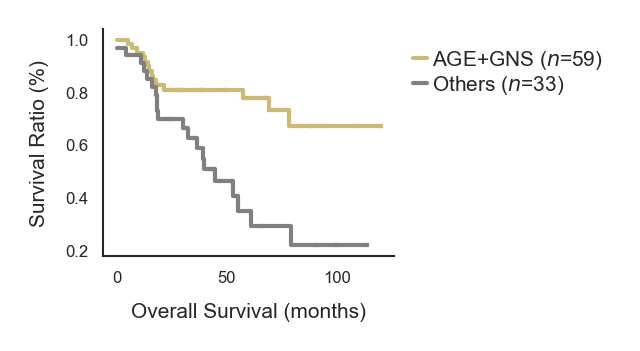

In [60]:
input_df=df.copy()
cancer="ACC"
cat="AGE+GNS"
input_df=df[df["CancerType"]==cancer]
input_df[cat]= [ cat if x in ["AGE","GNS"] else "Others" for x in input_df["cluster_m2_names"]  ] 
group_order=[cat,"Others"]
colors=["y","grey"]

fig=plt.figure(figsize=(1.25,1))
ax=fig.add_subplot(111)
KMcurve(data=input_df,category=cat,group_order=group_order,
        colors=colors,duration_limit=120,linewidth=1,ax=ax)
ax.set_xlabel("Overall Survival (months)",fontsize=5)
ax.set_ylabel("Survival Ratio (%)",fontsize=5)
ax.tick_params(labelsize=4)
ax.legend(bbox_to_anchor=(1,1),frameon=False,edgecolor="k",fontsize=5,handlelength=0.7,labelspacing=0.1,handletextpad=0.2)

#plt.savefig(store+"KM_subtype_ACC.png",dpi=300,bbox_inches="tight")

# ICI monotherapy responce info by cancer-type

In [67]:
ici_info=pd.read_csv("../data/ICI_response_rate_per_cancertype.tsv"
                     ,index_col=2,sep="\t")
ici_info=ici_info[~ici_info.index.isna()]
ici_info=ici_info.sort_values("ORR",ascending=False)
ici_info.drop("UCEC",axis=0,inplace=True)
ici_info.drop("nonCRC_MMRd",axis=0,inplace=True)
ici_info

,original,TCGA,PD1/L1 Responders,PD1/L1 1 Total Treated,PD1/L1 ORR,ORR,Note
TCGA_set,,,,,,,
UCEC_MMRd,Endometrial - MSI,UCEC_MMRd,97.0,216.0,0.449074,44.907407,From_papers
SKCM,Melanoma,SKCM,323.0,872.0,0.370413,37.041284,NaN
CRC_MMRd,Colorectal - MSI high,CRC_MMRd,42.0,135.0,0.311111,31.111111,NaN
KRC,Renal Cell,KRC,112.0,472.0,0.237288,23.728814,NaN
CESC,Cervical Cancer,CESC,13.0,66.0,0.196970,19.696970,NaN
BLCA,Urothelial/Bladder,BLCA,196.0,1080.0,0.181481,18.148148,NaN
LUSC,Non-small cell lung cancer - squamous,LUSC,67.0,385.0,0.174026,17.402597,NaN
LIHC,Hepatocellular Carcinoma,LIHC,70.0,405.0,0.172840,17.283951,NaN
LUAD,Non-small cell lung cancer - Nonsquamous,LUAD,191.0,1137.0,0.167986,16.798593,NaN


In [68]:
cancer_icires_orders=list(ici_info.index)
rest=['LGG', 'UCS', 'KICH','THCA', 'PCPG']

In [69]:
df["CancerType2"]=df.CancerType.replace({'STAD':"STES","ESCA":"STES",'KIRP':"KRC",'KIRC':"KRC"})

In [70]:
# divide CRC,UCEC into MSI and MSS
cancertype3=[]
for i,cancer in enumerate(df.CancerType2):
    if cancer=="CRC":
        if (df["MSI_annotation"][i]==1.0) | (df["MSI_high"][i]==1.0):
            cancertype3.append("CRC_MMRd")    
        else:
            cancertype3.append("CRC_MMRp")
    elif cancer=="UCEC":
        if (df["MSI_annotation"][i]==1.0) | (df["MSI_high"][i]==1.0):
            cancertype3.append("UCEC_MMRd")    
        else:
            cancertype3.append("UCEC_MMRp")
    else:
        cancertype3.append(cancer)
df["CancerType3"]=cancertype3

"make nonCRC_MMRD by MSI annotation & MSIsensor score"
cancertype_nonCRC_MMRD=[]
for i,cancer in enumerate(df.CancerType2):
    if cancer=="CRC":
        cancertype_nonCRC_MMRD.append(0)
    elif (df["MSI_annotation"][i]==1.0) | (df["MSI_high"][i]==1.0) :
        cancertype_nonCRC_MMRD.append(1)    
    else:
        cancertype_nonCRC_MMRD.append(0)
df["nonCRC_MMRd"]=cancertype_nonCRC_MMRD

In [72]:
dict_cluster_cancer_count={}
for cancer in df.CancerType3.unique():
    target_df=df[df.CancerType3==cancer]
    dict_cluster_cancer_count[cancer]=dict( Counter(target_df["cluster_m2_names"]))

dict_cluster_cancer_count["nonCRC_MMRd"]=dict( Counter( df[df["nonCRC_MMRd"]==True]["cluster_m2_names"]) )

In [73]:
df_cluster_cancer_count=pd.DataFrame(dict_cluster_cancer_count).fillna(0)
df_cluster_cancer_count=df_cluster_cancer_count.loc[cluster_orders,cancer_icires_orders+rest]
df_cluster_cancer_count

,UCEC_MMRd,SKCM,CRC_MMRd,KRC,CESC,BLCA,LUSC,LIHC,LUAD,MESO,HNSC,UCEC_MMRp,STES,OV,SARC,GBM,CHOL,UVM,PRAD,ACC,BRCA,PAAD,TGCT,CRC_MMRp,LGG,UCS,KICH,THCA,PCPG
SMK,5.0,4.0,0.0,20.0,4.0,22.0,388.0,141.0,335.0,0.0,63.0,3.0,17.0,25.0,7.0,3.0,2.0,0.0,0.0,4.0,20,0.0,0.0,9,0.0,0.0,0.0,0.0,0.0
UVL,0.0,384.0,0.0,0.0,0.0,2.0,3.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,5.0,1.0,0.0,0.0,0.0,0.0,1,0.0,0.0,1,0.0,0.0,0.0,1.0,0.0
APB,1.0,1.0,1.0,4.0,213.0,294.0,41.0,1.0,29.0,0.0,190.0,27.0,41.0,3.0,1.0,0.0,3.0,0.0,0.0,1.0,157,6.0,0.0,6,1.0,3.0,0.0,12.0,0.0
POL,13.0,0.0,2.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,41.0,3.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,2,1.0,0.0,11,1.0,1.0,0.0,0.0,0.0
MRD,137.0,1.0,71.0,1.0,6.0,0.0,2.0,2.0,1.0,1.0,4.0,2.0,82.0,1.0,3.0,3.0,1.0,0.0,3.0,4.0,8,0.0,0.0,3,1.0,1.0,1.0,0.0,0.0
HRD,0.0,23.0,1.0,329.0,17.0,41.0,33.0,90.0,53.0,36.0,59.0,86.0,94.0,315.0,107.0,79.0,15.0,8.0,61.0,24.0,297,14.0,9.0,59,50.0,19.0,6.0,26.0,5.0
GNS,0.0,21.0,0.0,84.0,2.0,4.0,7.0,9.0,16.0,17.0,9.0,5.0,7.0,30.0,18.0,3.0,6.0,35.0,58.0,17.0,55,16.0,91.0,2,27.0,0.0,13.0,251.0,106.0
AGE,7.0,33.0,6.0,179.0,45.0,48.0,18.0,121.0,81.0,28.0,179.0,203.0,377.0,61.0,96.0,299.0,18.0,37.0,372.0,42.0,445,140.0,28.0,361,427.0,33.0,46.0,202.0,68.0


In [74]:
# convert  to ratio
count_sums=df_cluster_cancer_count.apply(np.sum)
df_cluster_cancer_count_ratio=df_cluster_cancer_count/count_sums
df_cluster_cancer_count_ratio

,UCEC_MMRd,SKCM,CRC_MMRd,KRC,CESC,BLCA,LUSC,LIHC,LUAD,MESO,HNSC,UCEC_MMRp,STES,OV,SARC,GBM,CHOL,UVM,PRAD,ACC,BRCA,PAAD,TGCT,CRC_MMRp,LGG,UCS,KICH,THCA,PCPG
SMK,0.030675,0.008565,0.000000,0.032415,0.013841,0.053398,0.788618,0.387363,0.650485,0.000000,0.124260,0.008174,0.027375,0.057471,0.029536,0.007692,0.044444,0.0000,0.000000,0.043478,0.020305,0.000000,0.000000,0.019912,0.000000,0.000000,0.000000,0.000000,0.000000
UVL,0.000000,0.822270,0.000000,0.000000,0.000000,0.004854,0.006098,0.000000,0.000000,0.000000,0.005917,0.000000,0.000000,0.000000,0.021097,0.002564,0.000000,0.0000,0.000000,0.000000,0.001015,0.000000,0.000000,0.002212,0.000000,0.000000,0.000000,0.002033,0.000000
APB,0.006135,0.002141,0.012346,0.006483,0.737024,0.713592,0.083333,0.002747,0.056311,0.000000,0.374753,0.073569,0.066023,0.006897,0.004219,0.000000,0.066667,0.0000,0.000000,0.010870,0.159391,0.033898,0.000000,0.013274,0.001972,0.052632,0.000000,0.024390,0.000000
POL,0.079755,0.000000,0.024691,0.000000,0.006920,0.002427,0.000000,0.000000,0.000000,0.000000,0.000000,0.111717,0.004831,0.000000,0.000000,0.005128,0.000000,0.0000,0.002020,0.000000,0.002030,0.005650,0.000000,0.024336,0.001972,0.017544,0.000000,0.000000,0.000000
MRD,0.840491,0.002141,0.876543,0.001621,0.020761,0.000000,0.004065,0.005495,0.001942,0.012195,0.007890,0.005450,0.132045,0.002299,0.012658,0.007692,0.022222,0.0000,0.006061,0.043478,0.008122,0.000000,0.000000,0.006637,0.001972,0.017544,0.015152,0.000000,0.000000
HRD,0.000000,0.049251,0.012346,0.533225,0.058824,0.099515,0.067073,0.247253,0.102913,0.439024,0.116371,0.234332,0.151369,0.724138,0.451477,0.202564,0.333333,0.1000,0.123232,0.260870,0.301523,0.079096,0.070312,0.130531,0.098619,0.333333,0.090909,0.052846,0.027933
GNS,0.000000,0.044968,0.000000,0.136143,0.006920,0.009709,0.014228,0.024725,0.031068,0.207317,0.017751,0.013624,0.011272,0.068966,0.075949,0.007692,0.133333,0.4375,0.117172,0.184783,0.055838,0.090395,0.710938,0.004425,0.053254,0.000000,0.196970,0.510163,0.592179
AGE,0.042945,0.070664,0.074074,0.290113,0.155709,0.116505,0.036585,0.332418,0.157282,0.341463,0.353057,0.553134,0.607085,0.140230,0.405063,0.766667,0.400000,0.4625,0.751515,0.456522,0.451777,0.790960,0.218750,0.798673,0.842209,0.578947,0.696970,0.410569,0.379888


In [75]:
sig_cluster_ratio=pd.DataFrame( np.sum( df_cluster_cancer_count_ratio.loc[["SMK","UVL","APB","POL","MRD"],:],axis=0) )
sig_cluster_ratio.columns=["SCR"]

In [76]:
responsive_rate_ordered=ici_info.reindex(cancer_icires_orders)[["ORR"]]

In [77]:
df_orr_scr=pd.merge(responsive_rate_ordered,sig_cluster_ratio,left_index=True,right_index=True,how="left")

In [78]:
df_orr_scr["FDA_approved"]=[ int( x in approved_order[0:11] )  for x in df_orr_scr.index] 
df_orr_scr.loc[["CRC_MMRd","KRC","STES","UCEC_MMRd"],"FDA_approved"]=1 #"nonCRC_MMRd",
df_orr_scr

,ORR,SCR,FDA_approved
TCGA_set,,,
UCEC_MMRd,44.907407,0.957055,1
SKCM,37.041284,0.835118,1
CRC_MMRd,31.111111,0.913580,1
KRC,23.728814,0.040519,1
CESC,19.696970,0.778547,1
BLCA,18.148148,0.774272,1
LUSC,17.402597,0.882114,1
LIHC,17.283951,0.395604,1
LUAD,16.798593,0.708738,1


R2 0.5994162231994418
pearson (0.774219751233099, 9.018872274412094e-06)


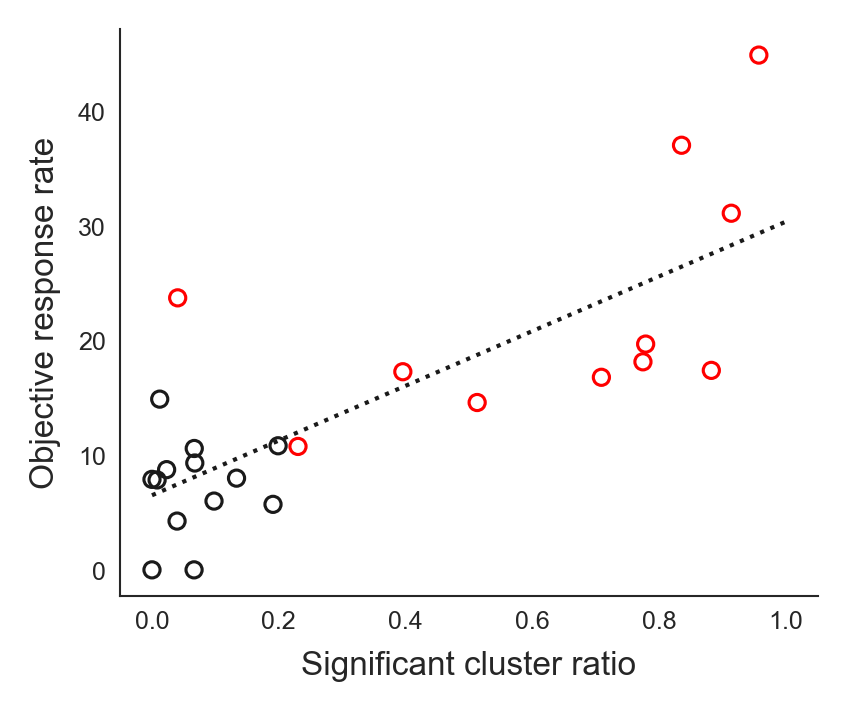

In [79]:
fig=plt.figure(figsize=(3,2.5))
ax=fig.add_subplot(111)
val1="SCR"
val2="ORR"
plt_df=df_orr_scr.dropna()
x=plt_df[val1]
y=plt_df[val2]
colors=[ "red" if x==1.0 else "k" for x in plt_df["FDA_approved"]]
ax.scatter(x,y,edgecolor=colors,s=15,marker="o",fc="None",lw=0.75) #"w",edgecolors=c
ax.set_xlabel("Significant cluster ratio",fontsize=8)
ax.set_ylabel("Objective response rate",fontsize=8)
ax.tick_params(labelsize=6)

res=stats.linregress(x,y)
print("R2", res.rvalue**2)

ax.plot([0,1], [ res[1], res[0]+res[1]],c="k",ls="dotted",lw=1)

print( "pearson",stats.pearsonr(x,y) )

#print( "spearman",stats.spearmanr(x,y) )

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#plt.savefig(store+"Cor_ICI_vs_SCR.png",dpi=300,bbox_inches="tight",transparent=True)

UCEC_MMRd
SKCM
CRC_MMRd
KRC
CESC
BLCA
LUSC
LIHC
LUAD
MESO
HNSC
UCEC_MMRp
STES
OV
SARC
GBM
CHOL
UVM
PRAD
ACC
BRCA
PAAD
TGCT
CRC_MMRp
LGG
UCS
KICH
THCA
PCPG


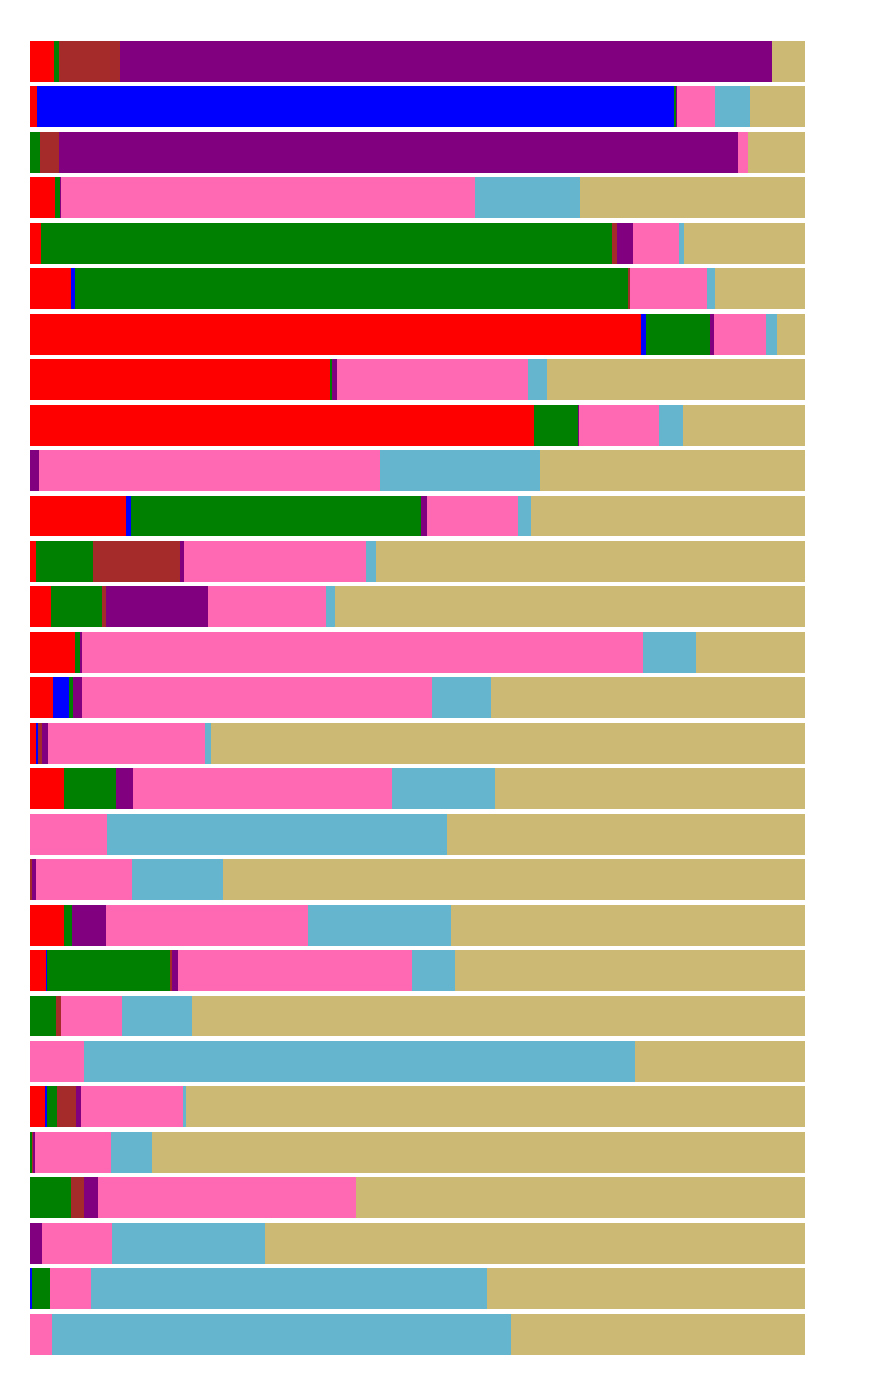

In [80]:
plt_df=df_cluster_cancer_count_ratio.copy()

fig=plt.figure(figsize=(3.5,5.9))
ax=fig.add_subplot(111)
plt_df.T.plot.barh(stacked=True,width=0.9,lw=0,ec="k",color=cluster_colors,ax=ax,)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.legend([])
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.invert_yaxis()
for i in plt_df.columns:
    print(i)

Text(-9.166666666666668, 0.5, '')

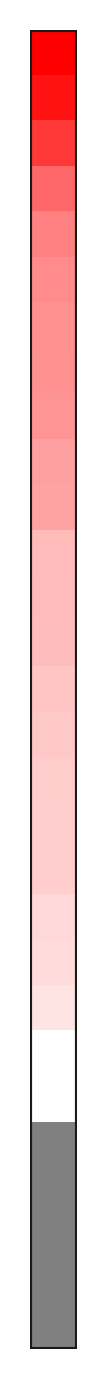

In [81]:
# colorbar
plt.figure(figsize=(0.2,5.825))
plt_df=df_orr_scr
sns_df=pd.DataFrame(plt_df["ORR"])
sns_df=sns_df.reindex( list(sns_df.index)+rest,axis=0)
mask = np.zeros_like(sns_df)
mask[np.triu_indices_from(mask)] = True
g=sns.heatmap(sns_df,cmap=wr,xticklabels=0,yticklabels=0,cbar=False,linewidths=0,vmin=0,vmax=40)
g.set_facecolor("grey")
plt.axvline(x=0, color='k',linewidth=1)
plt.axvline(x=sns_df.shape[1], color='k',linewidth=1)
plt.axhline(y=0, color='k',linewidth=1)
plt.axhline(y=sns_df.shape[0], color='k',linewidth=1)
plt.ylabel("")
#plt.savefig(store+"ICI_resp_by_cancertype_orr.png",dpi=300,bbix_inches="tight")

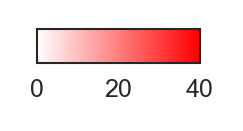

In [65]:
import matplotlib as mpl
cmap=wr
vmin=0
vmax=40
bounds=[0,20,40]

norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
fig=plt.figure(figsize=(0.7,0.15) )
ax=fig.add_subplot(111)
mpl.colorbar.ColorbarBase(ax, cmap=cmap, norm=norm,ticks=bounds,orientation = 'horizontal')
ax.tick_params(labelsize=6)